# Previsão dos Hits do Spotify

##### Neste notebook é criado um algoritmo que com base nos arquivos fornecidos no kaggle faz uma previsão de qual será a próxima música popular no spotify

## Importação das bibliotecas utilizadas no código

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

## Importação dos dados

In [3]:
#Importando dados
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

## Análise dos dados

In [4]:
#Fazendo análise dos dados de treino
treino.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [5]:
#Fazendo análise dos dados de treino
teste.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [6]:
#Analisando informações gerais dos dados de treino
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [7]:
#Verificando a existênia de dados nulos no conjunto de treino
treino.isnull().sum()       

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64

In [8]:
#Verificando a existênia de dados nulos no conjunto de teste
teste.isnull().sum()

track_unique_id     0
track_id            0
artists             1
album_name          1
track_name          1
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Limpeza e tratamento dos dados

### Tratamento dos valores nulos

In [9]:
# Tratando valores nulos preenchendo com strings vazia para colunas categóricas
teste['artists'].fillna('', inplace=True)
teste['album_name'].fillna('', inplace=True)
teste['track_name'].fillna('', inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_21604\1972323681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  teste['artists'].fillna('', inplace=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_21604\1972323681.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

### Codificação das variáveis categóricas

In [10]:
# Codificando variáveis categóricas explicit e mode no dataset treino e teste
treino['explicit'] = treino['explicit'].astype('category')
treino['mode'] = treino['mode'].astype('category')

teste['explicit'] = teste['explicit'].astype('category')
teste['mode'] = teste['mode'].astype('category')

#Convertendo explicit e mode para variáveis numéricas
treino['explicit'] = treino['explicit'].cat.codes
treino['mode'] = treino['mode'].cat.codes

teste['explicit'] = teste['explicit'].cat.codes
teste['mode'] = teste['mode'].cat.codes

### Confirmação do tratamento

In [11]:
#Verificando a coficação no conjunto de treino
treino[['explicit', 'mode']].head()

,explicit,mode
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [12]:
#Verificando a coficação no conjunto de teste
teste[['explicit', 'mode']].head()

,explicit,mode
0,0,1
1,0,1
2,0,0
3,0,1
4,0,0


### Normalização dos dados

In [13]:
#Aplicar escalonaento nos dados numéricos
scaler = StandardScaler()

colunas_numericas = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

treino[colunas_numericas] = scaler.fit_transform(treino[colunas_numericas])
teste[colunas_numericas] = scaler.transform(teste[colunas_numericas])


### Codificação das variáveis categóricas

In [14]:
# Codificando variáveis categóricas explicit e mode no dataset treino e teste
treino['track_genre'] = treino['track_genre'].astype('category').cat.codes
teste['track_genre'] = teste['track_genre'].astype('category').cat.codes


In [15]:
#Verificando a coficação no conjunto de treino
treino[colunas_numericas + ['track_genre']].head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,-0.155809,-1.515338,0.825132,-0.502686,-0.282524,-0.947099,-0.323754,1.318896,-0.595605,0.658493,41
1,-0.303659,-1.619319,-1.795774,-0.747946,-0.451941,1.849631,-0.505047,-0.683485,-1.317590,-1.282208,76
2,-0.108474,0.090590,-0.527081,-0.277483,-0.459513,1.389495,0.143765,-0.517234,0.269232,-1.055969,54
3,-0.090960,-2.335633,-2.405065,-2.956080,-0.355402,2.033084,2.386439,-0.559323,-1.681671,-1.757899,16
4,-0.521060,0.460300,1.111483,0.192582,0.948829,-0.944450,0.687541,-0.433056,-1.170877,0.531179,109


In [16]:
#Verificando a coficação no conjunto de teste
teste[colunas_numericas + ['track_genre']].head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,2.021191,-1.145628,-0.173119,0.254145,-0.514408,-0.931906,-0.506192,-0.196306,-1.651170,0.866263,113
1,-1.275178,-2.289419,1.413742,0.928958,0.314696,-0.931606,2.071114,1.087407,-1.717577,0.004891,42
2,-0.136344,-2.277865,0.642185,-0.358906,0.560778,0.896277,-0.500047,-0.096344,-1.488627,-1.553435,59
3,-0.728305,0.668262,-0.519127,0.529392,-0.538070,0.273740,-0.505558,-0.538278,0.477719,-0.403636,90
4,0.079867,-0.071158,1.191024,0.986946,-0.346884,0.508320,-0.506192,0.277195,1.307809,-0.988237,61


## Exploração dos dados

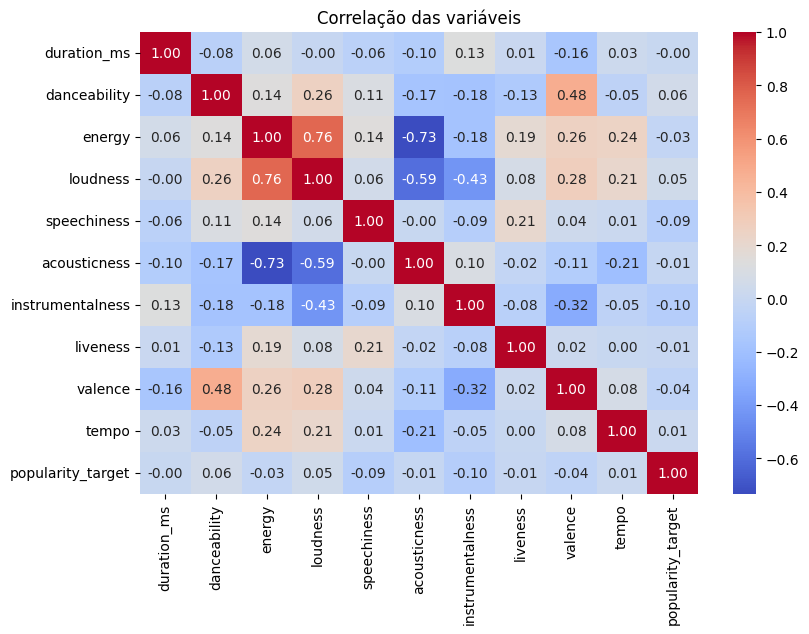

In [17]:
#Observando a correlação das variáveis para formulação de hipóteses
corr_matrix = treino[colunas_numericas + ['popularity_target']].corr()

# Exibir um heatmap das correlações
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variáveis')
plt.show()


# Hipóteses

Primeira Hipótese: Gêneros influenciam na popularidade da música 

Justificativa: Existem certos gêneros que tendem a fazer mais sucesso

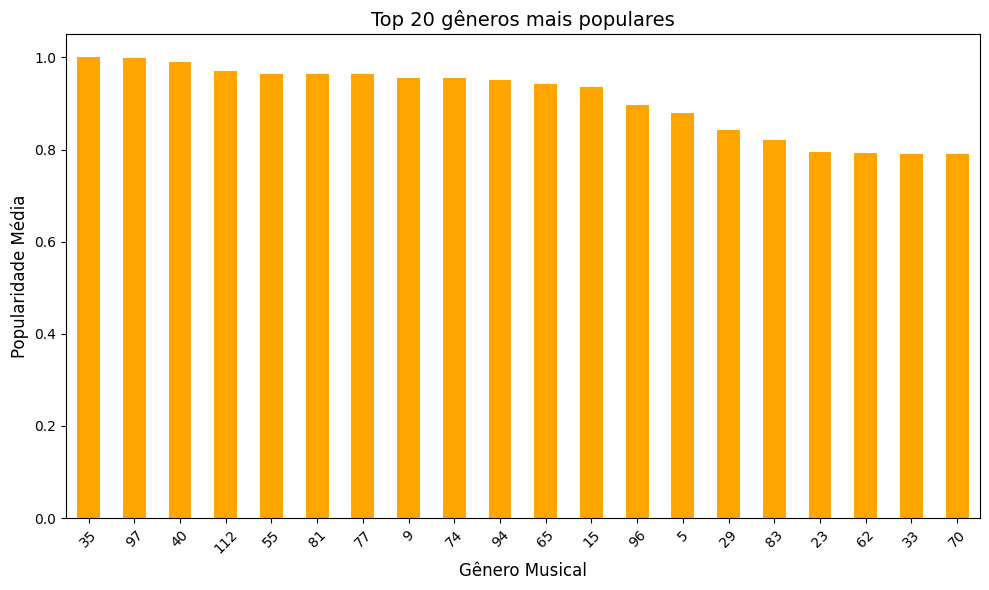

In [18]:
genre_popularity = treino.groupby('track_genre')['popularity_target'].mean().sort_values(ascending=False)

# Selecionando os 20 gêneros de música mais populares
top_20_genres = genre_popularity.head(20)

# Plotando os 20 gêneros mais populares e suas popularidades
plt.figure(figsize=(10, 6))
top_20_genres.plot(kind='bar', color='orange')

# Adicionando título e legendas
plt.title('Top 20 gêneros mais populares', fontsize=14)
plt.xlabel('Gênero Musical', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)

# Rotacionando eixo x
plt.xticks(rotation=45)

# Plotando gráfico
plt.tight_layout()
plt.show()

Esse gráfico mostra que existem gêneros mais populares e que músicas desse gêneros, portanto, possuem uma maior possibilidade de fazerem sucesso.

Segunda Hipótese: Músicas com maior volume fazem mais sucesso 

Justificativa: Músicas com maior volume geralmente são músicas mais voltadas para o público portanto tendem a fazer mais sucesso

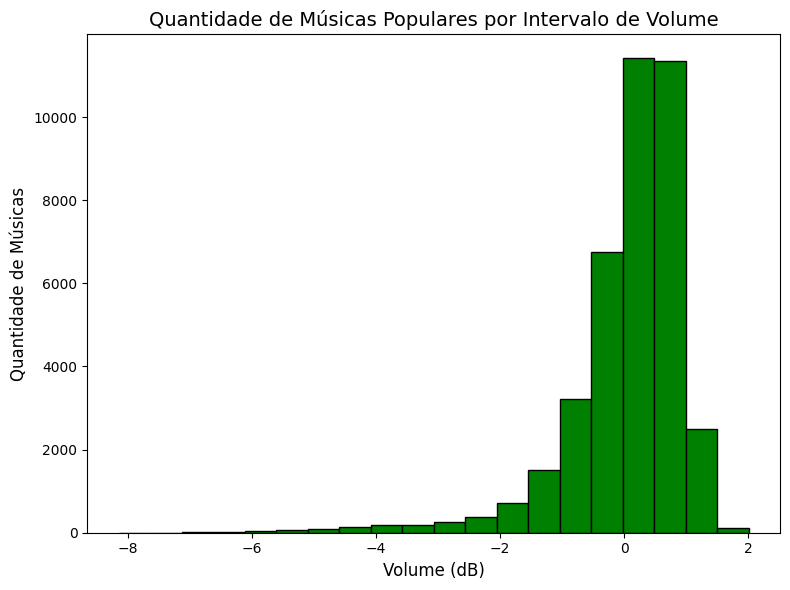

In [19]:
# Filtrando músicas populares (definindo como popular aquelas com popularidade maior que uma certa nota, por exemplo 1)
musicas_populares = treino[treino['popularity_target'] == 1]

# Criando um histograma para volume (loudness) das músicas populares
plt.figure(figsize=(8, 6))
plt.hist(musicas_populares['loudness'], bins=20, color='green', edgecolor='black')

# Adicionando título e rótulos
plt.title('Quantidade de Músicas Populares por Intervalo de Volume', fontsize=14)
plt.xlabel('Volume (dB)', fontsize=12)
plt.ylabel('Quantidade de Músicas', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Esse gráfico demonstra que a maior parte das músicas populares são as de maior volume no gráfico

Terceira Hipótese: Músicas mais energéticas tendem a ser mais sucesso

Justificativa: Músicas mais energéticas são comumente produzidas para serem tocadas em festas o que as da uma maior chance de se tornarem populares

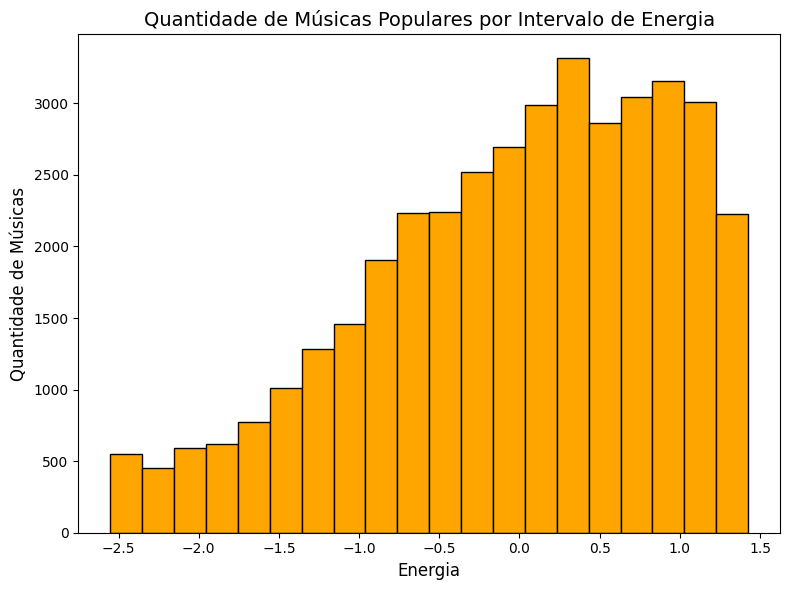

In [20]:
# Filtrando músicas populares (definindo como populares aquelas com popularidade maior que uma certa nota, por exemplo, 1)
musicas_populares = treino[treino['popularity_target'] == 1]

# Criando um histograma para a energia das músicas populares
plt.figure(figsize=(8, 6))
plt.hist(musicas_populares['energy'], bins=20, color='orange', edgecolor='black')

# Adicionando título e rótulos
plt.title('Quantidade de Músicas Populares por Intervalo de Energia', fontsize=14)
plt.xlabel('Energia', fontsize=12)
plt.ylabel('Quantidade de Músicas', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Esse gráfico demonstra que a maior parte das músicas populares são as de maior energia 

## Seleção de features

In [21]:
#Separando as features e o alvo
X = treino.drop(columns=['popularity_target', 'track_unique_id', 'track_id', 'artists', 'album_name', 'track_name'])
y= treino['popularity_target']

## Construção e Avaliação do Modelo

In [22]:
#instaciando o modelo
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [23]:
# Dividindo treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Convertendo os dados para o formato DMatrix do XGBoost
dados_treino = xgb.DMatrix(X_train, label=y_train)
dados_teste = xgb.DMatrix(X_val, label=y_val)

In [25]:
# Definindo os parâmetros do XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Número de classes
    'max_depth': 15,  # Profundidade da árvore
    'eta': 0.3,  # Taxa de aprendizado
    'eval_metric': 'mlogloss'  # Métrica de avaliação
}

In [26]:
# Treinando o modelo
model = xgb.train(params, dados_treino, num_boost_round=100)

# Fazendo previsões
previsoes = model.predict(dados_teste)

# Avaliando o modelo
accuracy = accuracy_score(y_val, previsoes)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 83.21%


In [27]:
#Relatório de desempenho
print(classification_report(y_val, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      8247
           1       0.82      0.83      0.83      7713

    accuracy                           0.83     15960
   macro avg       0.83      0.83      0.83     15960
weighted avg       0.83      0.83      0.83     15960



In [28]:
# Fazendo previsões com conjunto de teste
X_teste = teste.drop(columns=['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name'])
# Convertendo os dados para o formato DMatrix do XGBoost
dteste = xgb.DMatrix(X_teste)

previsoes_teste = model.predict(dteste)

# Gerar arquivo CSV para submissão
submission = teste[['track_unique_id']].copy()
submission['popularity_target'] = previsoes_teste
submission.to_csv('submission.csv', index=False)

## Finetuning de Hiperparâmetros

In [29]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_search.best_params_}')

c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

## Métricas do modelo

In [ ]:
# Previsões no conjunto de validação usando o melhor modelo encontrado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# Calcular a acurácia
accuracy = accuracy_score(y_val, y_pred)
print(f'Acurácia com o modelo otimizado: {accuracy:.2f}')

# Exibir outras métricas de avaliação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred))